In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
deaths_state.head()

,state,deaths_new,deaths_new_dod,deaths_bid,deaths_bid_dod
date,,,,,
2020-03-17,Johor,1,1,0,0
2020-03-17,Kedah,0,0,0,0
2020-03-17,Kelantan,0,0,0,0
2020-03-17,Melaka,0,0,0,0
2020-03-17,Negeri Sembilan,0,0,0,0


In [94]:
cases_state = pd.read_csv('./data/cases_state.csv', index_col=0)
cases_state_pivoted = cases_state.pivot(index='date', columns='state', values='cases_new')

deaths_state = pd.read_csv('./data/deaths_state.csv')
deaths_state_pivoted = deaths_state.pivot(index='date', columns='state', values='deaths_new')

tests_state = pd.read_csv('./data/tests_state.csv')
tests_state_pivoted = tests_state.pivot(index='date', columns='state', values='total')

quarantine_state = pd.read_csv('./data/pkrc.csv')
quarantine_state_pivoted = quarantine_state.pivot(index='date', columns='state', values='admitted_covid')
discharge_quarantine_state_pivoted = quarantine_state.pivot(index='date', columns='state', values='discharge_covid')

icu_state = pd.read_csv('./data/icu.csv')
icu_state_pivoted = icu_state.pivot(index='date', columns='state', values='icu_covid')

hospital = pd.read_csv('./data/hospital.csv')
hospital_admitted_pivoted = hospital.pivot(index='date', columns='state', values='admitted_covid')
hospital_discharged_pivoted = hospital.pivot(index='date', columns='state', values='discharged_covid')

population_state = pd.read_csv('./data/population.csv', index_col=0)
cases_state.head()

,date,state,cases_import,cases_new,cases_recovered
0,2020-01-25,Johor,4,4,0
1,2020-01-25,Kedah,0,0,0
2,2020-01-25,Kelantan,0,0,0
3,2020-01-25,Melaka,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0


In [95]:
pahang = pd.DataFrame()
pahang.index = quarantine_state_pivoted.index
pahang['quarantine'] = quarantine_state_pivoted['Pahang']
pahang['quarantine_discharge'] = discharge_quarantine_state_pivoted['Pahang']
pahang['cases'] = cases_state_pivoted['Pahang']
pahang['deaths'] = deaths_state_pivoted['Pahang']
pahang['hospital_admitted'] = hospital_admitted_pivoted['Pahang']
pahang['hospital_discharged'] = hospital_discharged_pivoted['Pahang']
pahang['icu_admitted'] = icu_state_pivoted['Pahang']
pahang['tests'] = tests_state_pivoted['Pahang']

In [96]:
pahang.fillna(0, inplace=True)
pahang.head()

,quarantine,quarantine_discharge,cases,deaths,hospital_admitted,hospital_discharged,icu_admitted,tests
date,,,,,,,,
2020-03-28,0.0,0.0,14,0,8.0,13.0,2.0,0.0
2020-03-29,0.0,0.0,12,0,24.0,2.0,6.0,0.0
2020-03-30,0.0,0.0,3,0,0.0,4.0,2.0,0.0
2020-03-31,0.0,0.0,4,0,3.0,6.0,4.0,0.0
2020-04-01,0.0,0.0,10,0,3.0,1.0,4.0,0.0


<AxesSubplot:xlabel='icu_admitted', ylabel='cases'>

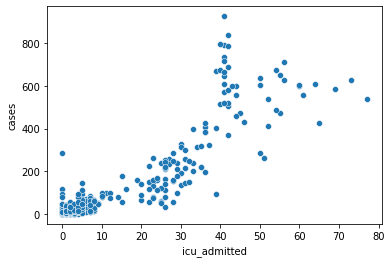

In [99]:
sns.scatterplot(x='icu_admitted', y='cases', data=pahang)

<AxesSubplot:xlabel='deaths', ylabel='cases'>

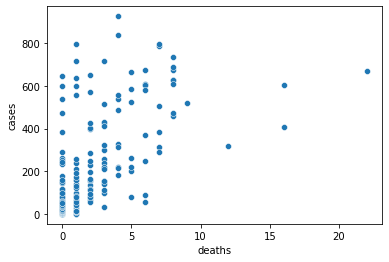

In [100]:
sns.scatterplot(x='deaths', y='cases', data=pahang)

<AxesSubplot:xlabel='quarantine', ylabel='cases'>

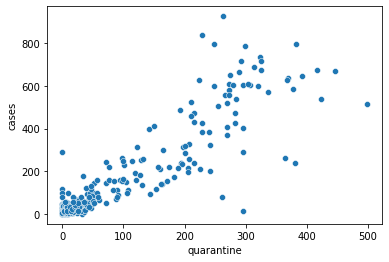

In [101]:
sns.scatterplot(x='quarantine', y='cases', data=pahang)

<AxesSubplot:xlabel='tests', ylabel='cases'>

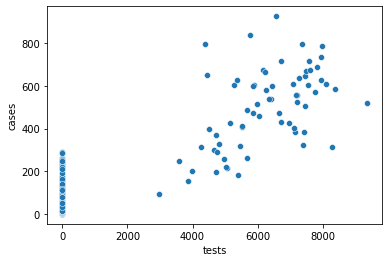

In [102]:
sns.scatterplot(x='tests', y='cases', data=pahang)

<AxesSubplot:xlabel='hospital_discharged', ylabel='cases'>

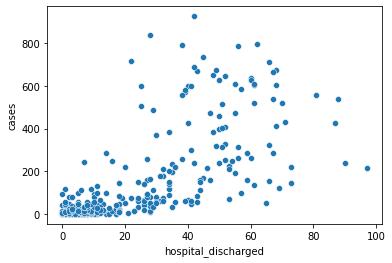

In [104]:
sns.scatterplot(x='hospital_discharged', y='cases', data=pahang)

<AxesSubplot:xlabel='hospital_admitted', ylabel='cases'>

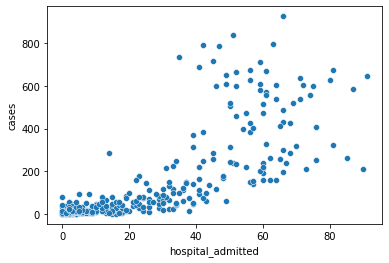

In [105]:
sns.scatterplot(x='hospital_admitted', y='cases', data=pahang)